In [93]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.tree import export_graphviz

plt.style.use('ggplot')

print("Imported packages successfully!")

Imported packages successfully!


In [94]:
df = pd.read_csv(r"C:\Users\ritz\Downloads\creditcarddata\creditcard.csv")

In [95]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [96]:
#peek at data
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
203196  134707.0  1.516 -1.272 -0.270  0.448 -1.061  0.261 -0.793  0.280   
68946    53201.0  1.353 -0.547  0.176 -0.578 -0.952 -0.901 -0.406 -0.126   
153733   99939.0 -4.437 -2.657  1.104  3.672  4.107 -2.045  0.598 -0.267   
264913  161651.0  1.124 -1.392 -2.104  0.843 -0.401 -1.108  0.766 -0.426   
122643   76638.0 -0.787  0.987  1.169  0.994  0.794  0.612  1.065 -0.405   

           V9  ...    V21    V22    V23    V24    V25    V26    V27    V28  \
203196  1.460  ...  0.240  0.268  0.126  0.728 -0.525 -0.484  0.001  0.006   
68946  -0.933  ...  0.212  0.582 -0.150  0.583  0.707 -0.094 -0.019 -0.004   
153733 -0.650  ... -0.138  0.877  2.726 -0.074  2.160  0.428  0.281 -0.321   
264913  0.929  ...  0.036 -0.673 -0.236 -0.107 -0.217 -0.138 -0.093  0.060   
122643  0.361  ... -0.237  0.164 -0.411 -0.735 -0.007 -0.245  0.019 -0.208   

        Amount  Class  
203196  218.72      0  
68946    18.00      0  
153733    7.59      0  
264913  476.21      0  
122643   55.26      0  

[5 rows x 31 columns]

In [97]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [98]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

<AxesSubplot:title={'center':'Distribution of Time Feature'}, xlabel='Time', ylabel='Density'>

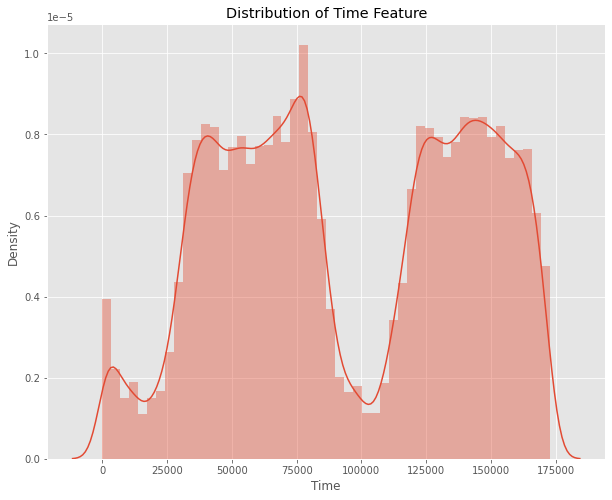

In [99]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

<AxesSubplot:title={'center':'Distribution of Monetary Value Feature'}, xlabel='Amount', ylabel='Density'>

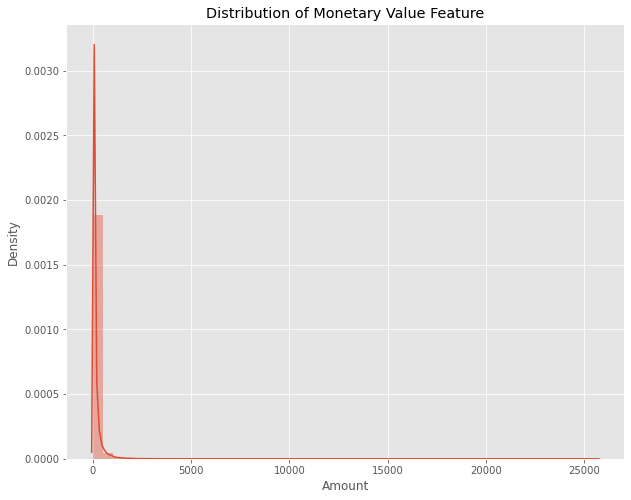

In [100]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [101]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

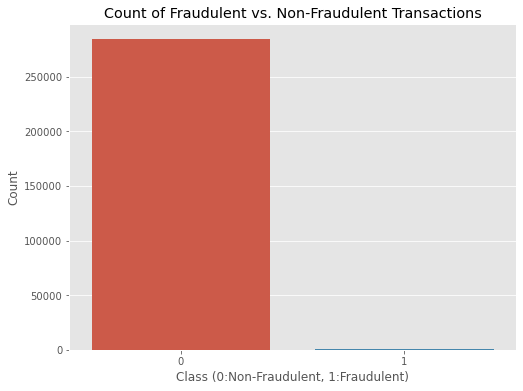

In [102]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [103]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1.0, 'Heatmap of Correlation')

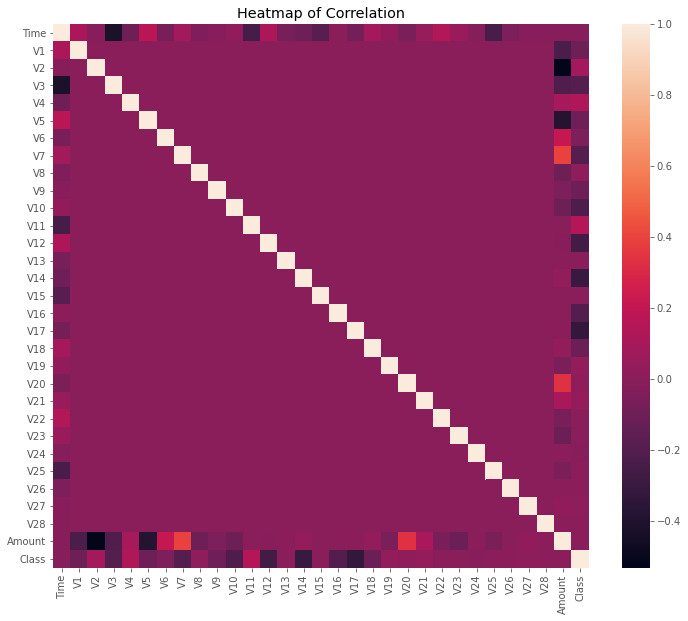

In [104]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

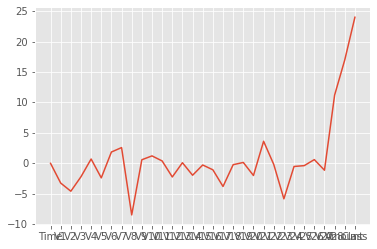

In [105]:
#skewness
skew_ = df.skew()
skew_
plt.plot(skew_)

**Scaling Amount and Time**

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [107]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [108]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
77381    57023.0 -0.683  0.239  2.120 -0.611 -0.021  0.521 -0.076  0.496   
183778  125947.0 -1.756  2.316 -2.069 -0.222 -0.252 -0.856 -0.396  1.597   
261458  160026.0 -0.157  0.840 -1.028 -0.371  1.129 -0.634  1.537 -0.616   
59154    48723.0 -1.621  1.170  1.028 -1.508 -0.475 -0.427  0.426  0.222   
148762   90186.0  2.173 -0.498 -1.245 -0.565 -0.231 -0.284 -0.981 -0.165   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
77381   0.361  ... -0.057 -0.300 -0.539  0.079  0.127  0.137   11.50      0   
183778 -0.757  ...  0.108  0.626  0.012 -0.452 -0.602 -0.139    5.85      0   
261458  0.269  ... -0.285 -1.053 -0.187 -0.126  0.022 -0.027  101.99      0   
59154   0.742  ...  0.156  0.240 -0.176  0.737  0.513  0.319   38.42      0   
148762  1.209  ...  0.088  0.136 -0.073 -0.133  0.006 -0.013   19.99      0   

        scaled_amount  scaled_time  
77381          -0.307       -0.796  
183778         -0.330        0.656  
261458          0.055        1.373  
59154          -0.200       -0.971  
148762         -0.273       -0.097  

[5 rows x 33 columns]

In [109]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [110]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256146, 31)
Test Shape: (28661, 31)


In [111]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [112]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 444 fraudulent transactions in the train data.


In [113]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [114]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
243489 -1.161  0.977 -1.301 -1.807  2.744  3.374  0.050  1.244 -0.321 -0.401   
214987 -3.166 -1.248 -2.276  0.916  0.188 -1.515  1.324  0.185 -0.537 -1.092   
18970   1.289 -0.770  0.674 -0.494 -1.347 -0.581 -0.779  0.062 -0.480  0.674   
68541   1.181  0.355  0.278  1.068 -0.005 -0.470  0.224 -0.155 -0.175 -0.064   
237247  0.147  1.233 -2.468  0.750  1.290 -0.588  1.542  0.054 -1.067  0.343   

        ...    V22    V23    V24    V25    V26    V27    V28  Class  \
243489  ... -0.714  0.032  0.697 -0.399  0.153 -0.198  0.167      0   
214987  ... -0.108  1.006 -0.024 -0.299  0.176  0.566 -1.007      0   
18970   ... -0.094  0.028  0.530  0.359 -0.342  0.004  0.009      0   
68541   ...  0.318 -0.091  0.115  0.645 -0.303  0.035  0.021      0   
237247  ...  1.730  0.003 -1.002 -0.966 -0.317  0.447  0.328      0   

        scaled_amount  scaled_time  
243489         -0.337        1.462  
214987          0.290        1.161  
18970          -0.233       -1.333  
68541          -0.292       -0.806  
237247         -0.019        1.397  

[5 rows x 31 columns]

In [115]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [116]:
subsample = pd.concat([selected, fraud])
len(subsample)

888

In [117]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2      V3     V4     V5     V6      V7     V8     V9     V10  \
0   1.153  0.072   1.315  1.329 -0.853 -0.165  -0.461  0.009  0.672  -0.245   
1 -12.381  8.213 -16.963  7.116 -9.773 -3.667 -16.147  2.079 -4.251 -16.746   
2  -7.223  6.156 -10.826  4.181 -6.124 -3.114  -6.895  5.162 -2.516  -6.403   
3  -1.644  3.130  -2.577  3.416 -0.449 -1.242  -1.992  1.003 -2.809  -4.154   
4  -0.412  1.144   1.216  1.667  0.102 -0.555   0.748 -0.608  1.118   0.497   
5  -1.550 -0.587   1.829 -2.676  0.350  1.001  -0.257  0.009 -0.407   0.367   
6  -0.433  2.428  -3.996  4.871 -1.796 -0.587  -4.655  1.285 -2.744  -5.639   
7  -2.051  1.462  -0.089 -3.121 -1.266 -1.662  -0.318  1.165  1.213  -1.981   
8  -0.055  0.997  -1.169 -1.283  1.811 -0.880   1.699 -0.389 -0.491  -0.522   
9   1.876 -0.210  -1.768  0.301  0.226 -0.500  -0.025  0.003  0.850  -0.687   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ...  0.145 -0.022  0.436  0.464 -0.414  0.082  0.042      0         -0.313   
1  ...  1.503 -0.768  0.372 -1.416 -0.517 -0.435  0.293      1          0.035   
2  ... -0.630  0.191 -0.061  0.380 -0.267  1.194  0.257      1          0.047   
3  ... -0.649 -0.319 -0.680  0.390  0.056  0.395  0.299      1         -0.327   
4  ...  0.415 -0.108  0.353 -0.458 -0.342 -0.849 -0.679      0         -0.253   
5  ...  0.633 -0.137 -0.384  0.606 -0.227 -0.496 -0.202      0         -0.229   
6  ... -0.409 -0.321 -0.804  0.963  0.200  1.095  0.541      1         -0.349   
7  ... -0.241  0.200  0.386 -0.378 -0.812  0.261  0.160      0         -0.296   
8  ...  0.824 -0.248  0.098 -0.173  0.098  0.389  0.273      0         -0.273   
9  ... -0.441  0.182  0.572 -0.137 -0.142 -0.027 -0.017      0         -0.105   

   scaled_time  
0       -0.463  
1       -0.019  
2       -1.117  
3       -0.690  
4       -1.806  
5        0.970  
6       -0.229  
7        1.119  
8        0.988  
9        0.643  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

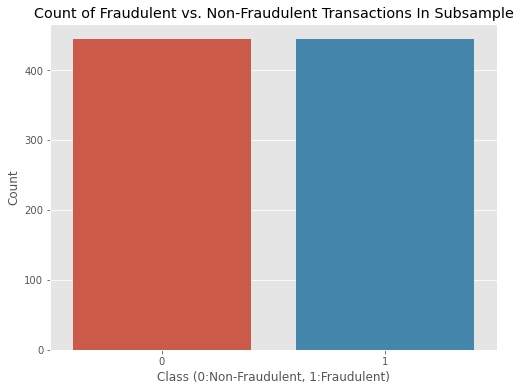

In [118]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [119]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -4.179e-01
V2             4.706e-01
V3            -5.606e-01
V4             6.889e-01
V5            -3.751e-01
V6            -4.203e-01
V7            -4.828e-01
V8             6.671e-02
V9            -5.444e-01
V10           -6.260e-01
V11            6.815e-01
V12           -6.813e-01
V13           -5.318e-02
V14           -7.481e-01
V15           -2.906e-02
V16           -6.003e-01
V17           -5.551e-01
V18           -4.668e-01
V19            2.316e-01
V20            1.673e-01
V21            1.433e-01
V22            9.011e-04
V23           -1.517e-02
V24           -9.226e-02
V25            5.247e-02
V26            6.174e-02
V27            9.315e-02
V28            3.126e-02
Class          1.000e+00
scaled_amount  7.460e-02
scaled_time   -1.801e-01

In [120]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.561
V9  -0.544
V10 -0.626
V12 -0.681
V14 -0.748
V16 -0.600
V17 -0.555

In [121]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.689
V11    0.682
Class  1.000

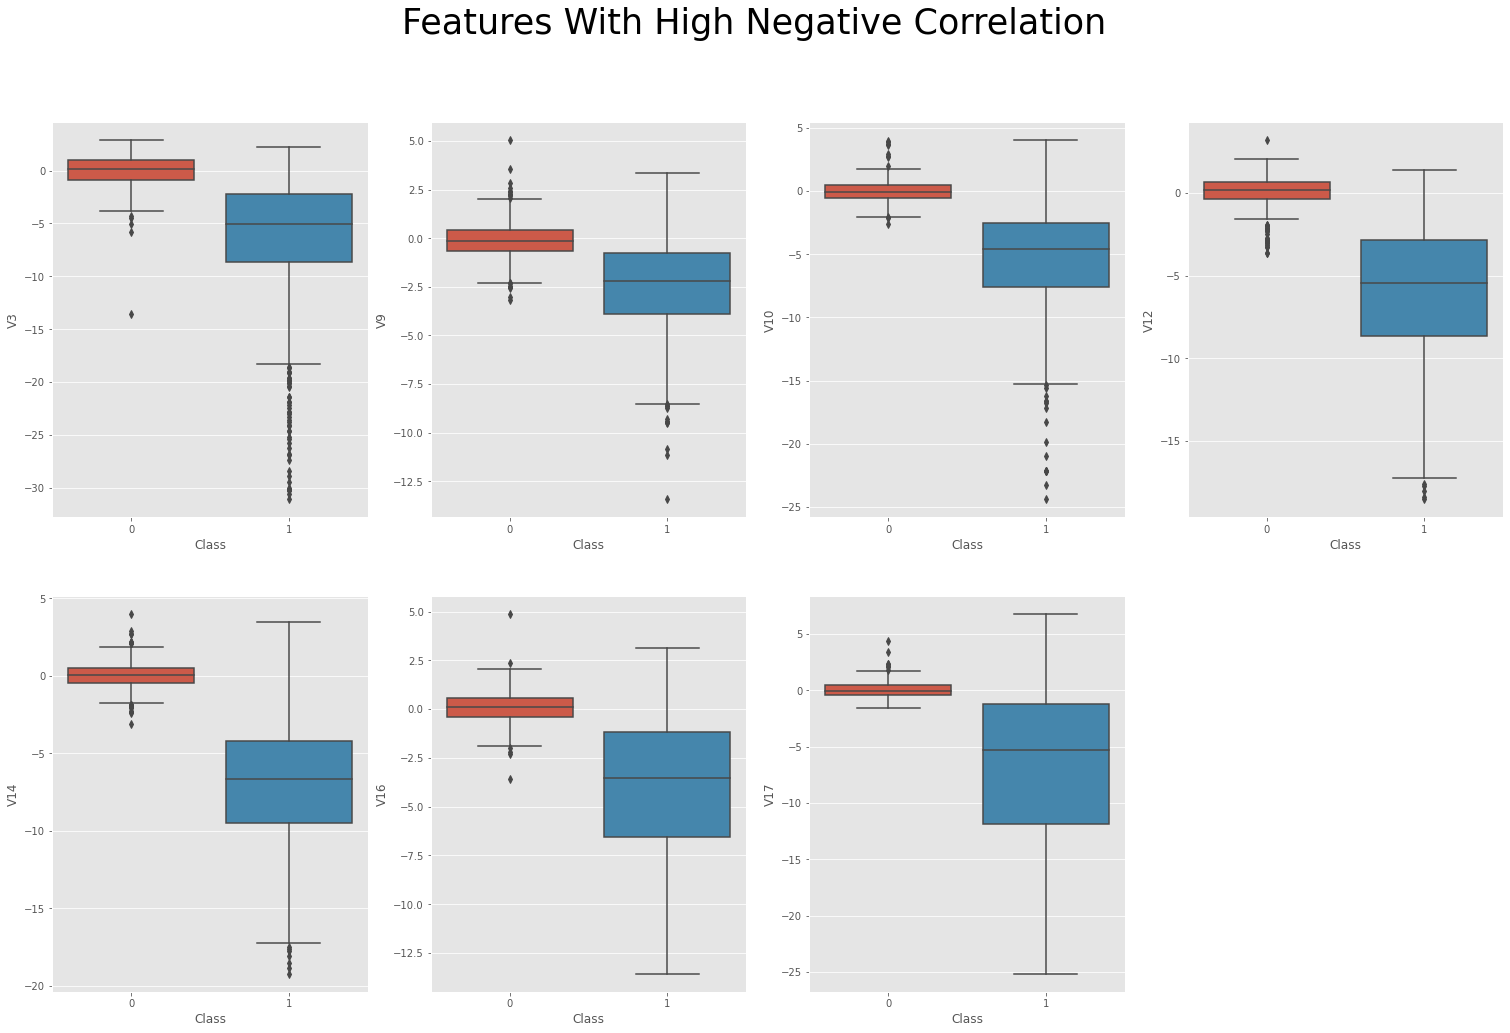

In [122]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

<AxesSubplot:xlabel='Class', ylabel='V11'>

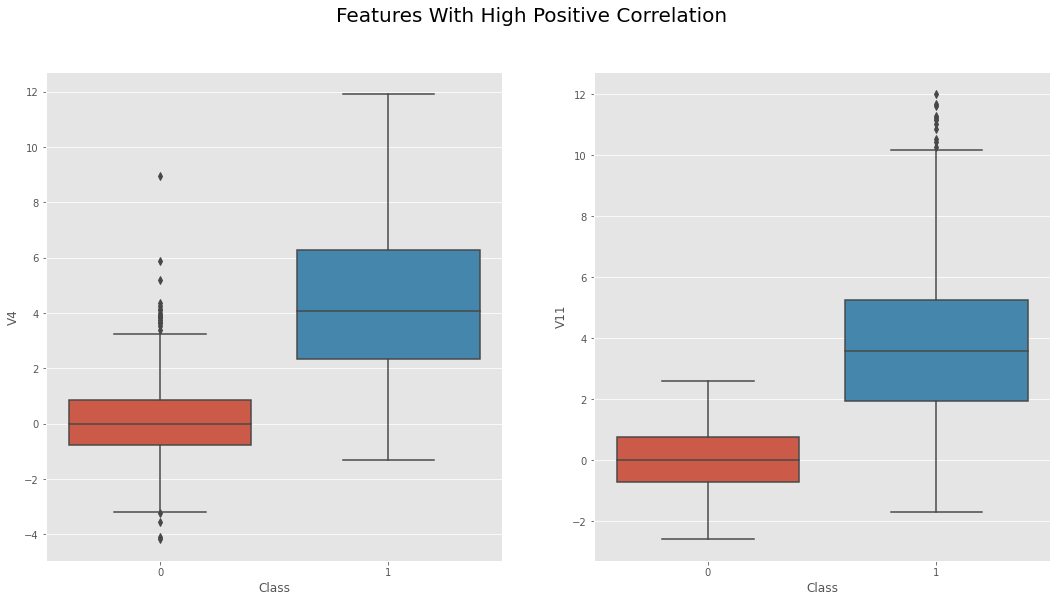

In [123]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [124]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [125]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 888 transactions by 258 transactions to 630 transactions.


**Dimensionality Reduction**

In [126]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [127]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

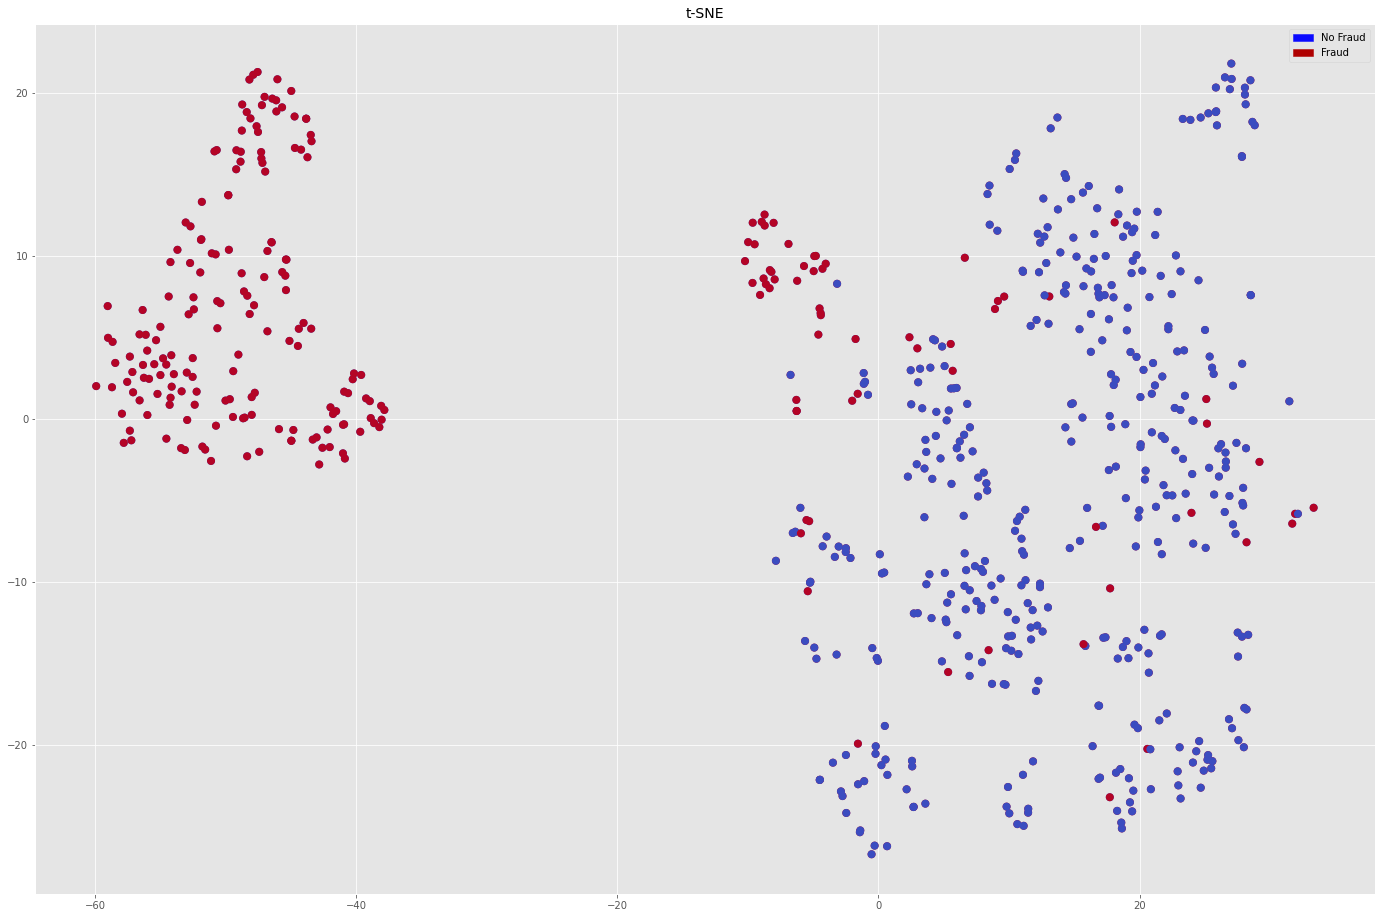

In [128]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classification Algorithms**

In [129]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [130]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [132]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (504, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (504,) (126,)


In [133]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [134]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(eval_metric='mlogloss')))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.979615 (0.015745)
LDA: 0.977172 (0.014825)
KNN: 0.962886 (0.033617)
CART: 0.869927 (0.032286)
SVM: 0.978292 (0.020264)
XGB: 0.978876 (0.013020)
RF: 0.966937 (0.019463)


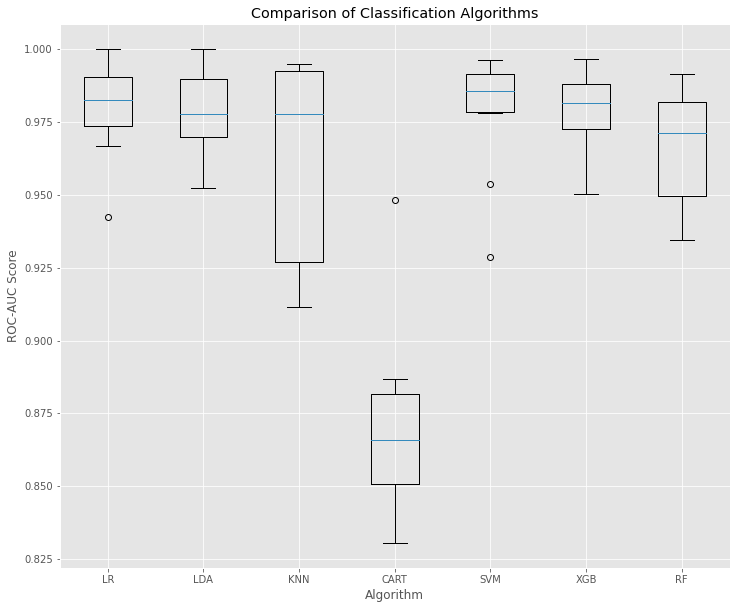

In [135]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [136]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [137]:
y_pred=model.predict(X_validation)

In [138]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9603174603174603
